![](https://pic3.zhimg.com/v2-5e0bf7df2f35e4db5aacede20683b85a_1200x500.jpg)
# 贝叶斯分类实现手写数字识别


 # $ P(A|B)=\frac{P(B|A)P(A)}{P(B)} $
 
 
 # $P(B_i|A)=\frac{P(A|B_i)P(B_i)}{\sum_{j=1}^n{P(A|B_j)P(B_j)}}$

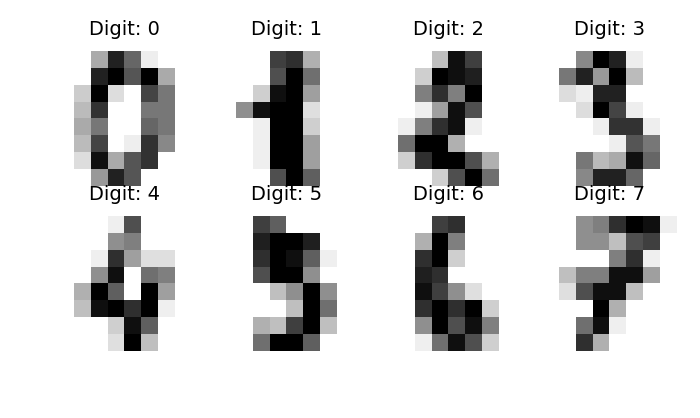

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

digits = datasets.load_digits() # 加载数据

# 把数据所代表的图片显示出来
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(4, 2), dpi=200)
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: %i' % label, fontsize=7)

In [6]:
print("shape of raw image data: {0}".format(digits.images.shape))
print("shape of data: {0}".format(digits.data.shape))
train_num = 1797
test_num = 100
class_num = 10
desimon = 64

# 把数据分成训练数据集和测试数据集
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data, digits.target, test_size=0.20, random_state=2);


shape of raw image data: (1797, 8, 8)
shape of data: (1797, 64)


In [7]:

prediction = []
for i in range(test_num):
    test = Xtest[i]
    class_rate = []
    # 求每一个类别的概率，这里MNIST数据集共有10个类别
    for j in range(class_num):
        # 找到样本中类别是j的下标
        class_is_j_index = np.where(Ytrain[:train_num] == j)[0]
        # 类别是j的比率
        j_rate = len(class_is_j_index)/len(Ytrain)
        # 取出类别是j的样本
        class_is_j_x = np.array([Xtrain[x] for x in class_is_j_index])
        # 遍历每个维度
        for k in range(desimon):
            # 找到j类样本集中该维度下的值与测试样本中该维度的值的差小于0.8的样本，并求占j类样本的比率，与j_rate依次相乘
            # 这里我规定的界限是0.8，因为MNIST中样本数字在0到1之间，并且是两端分布，要么是0，要么接近1。
            j_rate *= len([item for item in class_is_j_x if np.fabs(item[k] - test[k]) < 0.8])*1.0 / len(class_is_j_x)
        class_rate.append(j_rate)
    # 找到贝叶斯预测值最大的类别，作为该测试的预测类别，放到结果集中
    prediction.append(np.argmax(class_rate))
    print(i, 'prediction:', prediction[-1], 'actual:', Ytest[i])

accurancy = np.sum(np.equal(prediction, Ytest[:test_num])) / test_num
print('accurancy:', accurancy)


0 prediction: 0 actual: 4
1 prediction: 0 actual: 0
2 prediction: 0 actual: 9
3 prediction: 1 actual: 1
4 prediction: 0 actual: 4
5 prediction: 0 actual: 7
6 prediction: 1 actual: 1
7 prediction: 5 actual: 5
8 prediction: 1 actual: 1
9 prediction: 0 actual: 6
10 prediction: 6 actual: 6
11 prediction: 0 actual: 7
12 prediction: 6 actual: 6
13 prediction: 2 actual: 1
14 prediction: 0 actual: 5
15 prediction: 5 actual: 5
16 prediction: 0 actual: 4
17 prediction: 0 actual: 6
18 prediction: 0 actual: 2
19 prediction: 7 actual: 7
20 prediction: 4 actual: 4
21 prediction: 0 actual: 6
22 prediction: 4 actual: 4
23 prediction: 0 actual: 1
24 prediction: 5 actual: 5
25 prediction: 0 actual: 2
26 prediction: 9 actual: 9
27 prediction: 5 actual: 5
28 prediction: 0 actual: 4
29 prediction: 6 actual: 6
30 prediction: 5 actual: 5
31 prediction: 6 actual: 6
32 prediction: 3 actual: 3
33 prediction: 0 actual: 4
34 prediction: 0 actual: 0
35 prediction: 0 actual: 9
36 prediction: 0 actual: 9
37 predicti